# EDA With Students Performance Indicator

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings #we use this library to remove unwanted warnings
warnings.filterwarnings('ignore')

In [2]:
# Read the data
df = pd.read_csv("E:\Datasets\Exploratory analysis\stud.csv")
df.head()

gender race_ethnicity parental_level_of_education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test_preparation_course  math_score  reading_score  writing_score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75

In [3]:
df.shape

(1000, 8)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


The insights are:
- 3 categories have integers and rest do not
- No null values

In [5]:
df.describe()

math_score  reading_score  writing_score
count  1000.00000    1000.000000    1000.000000
mean     66.08900      69.169000      68.054000
std      15.16308      14.600192      15.195657
min       0.00000      17.000000      10.000000
25%      57.00000      59.000000      57.750000
50%      66.00000      70.000000      69.000000
75%      77.00000      79.000000      79.000000
max     100.00000     100.000000     100.000000

Insights are:
- Mean and standard deviations are almost the same in all given subjects
- Minimum marks in maths is 0 whereas in reading and writing are 17 and 10 resp.
- Maximum marks in all the subjects is the same ie. the marks obtained is full(hundred)

In [6]:
# Check Missing values
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

- There are no missing values in the dataset

In [7]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

- There are no values in the ds that has NA block

In [7]:
df.duplicated().sum()

0

- There are no duplicate values aswell

In [8]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [9]:
# seggregating the numerical and categorical features
numerical_feat = [feature for feature in df.columns if df[feature].dtypes != 'O']
categorical_feat = [feature for feature in df.columns if df[feature].dtypes == 'O']

In [10]:
numerical_feat

['math_score', 'reading_score', 'writing_score']

In [11]:
categorical_feat

['gender',
 'race_ethnicity',
 'parental_level_of_education',
 'lunch',
 'test_preparation_course']

In [12]:
# aggregate of the total score with mean 
df['total_score'] = (df['math_score'] + df['reading_score'] + df['writing_score'])
df['average'] = df['total_score'] / 3
df.head()

gender race_ethnicity parental_level_of_education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test_preparation_course  math_score  reading_score  writing_score  \
0                    none          72             72             74   
1               completed          69             90             88   
2                    none          90             95             93   
3                    none          47             57             44   
4                    none          76             78             75   

   total_score    average  
0          218  72.666667  
1          247  82.333333  
2          278  92.666667  
3          148  49.333333  
4          229  76.333333

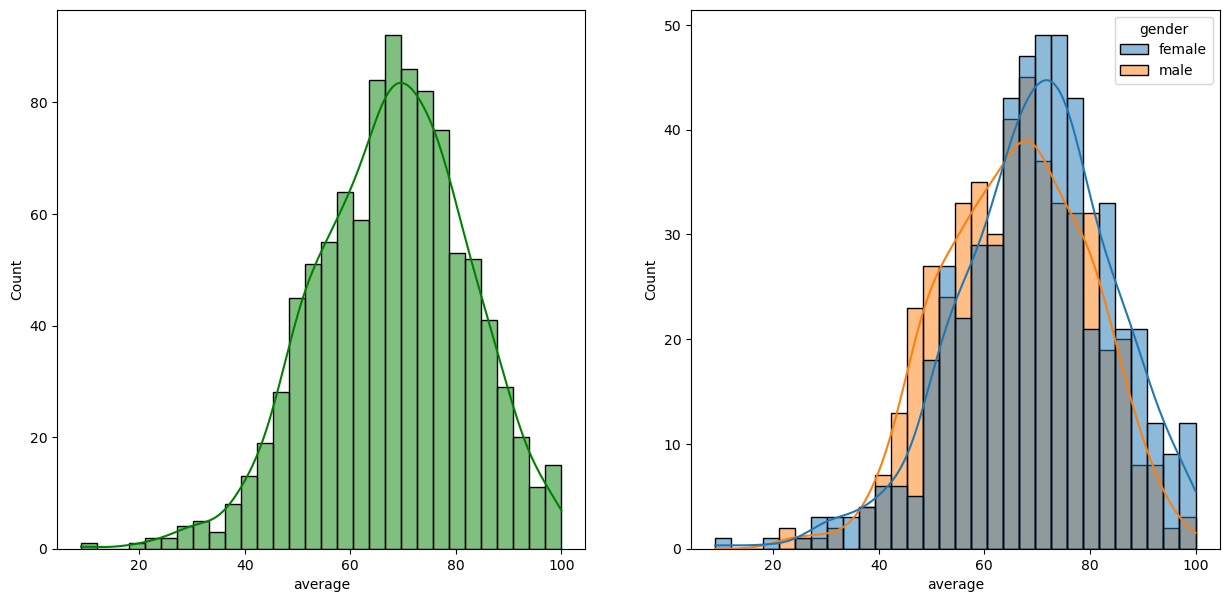

In [17]:
# Visualizing the data
fig , axis = plt.subplots(1,2, figsize=(15,7))
plt.subplot(121)
sns.histplot(data = df,x='average',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data = df,x='average',bins=30,kde=True,hue='gender')
plt.show()

- Female students performs better than male students

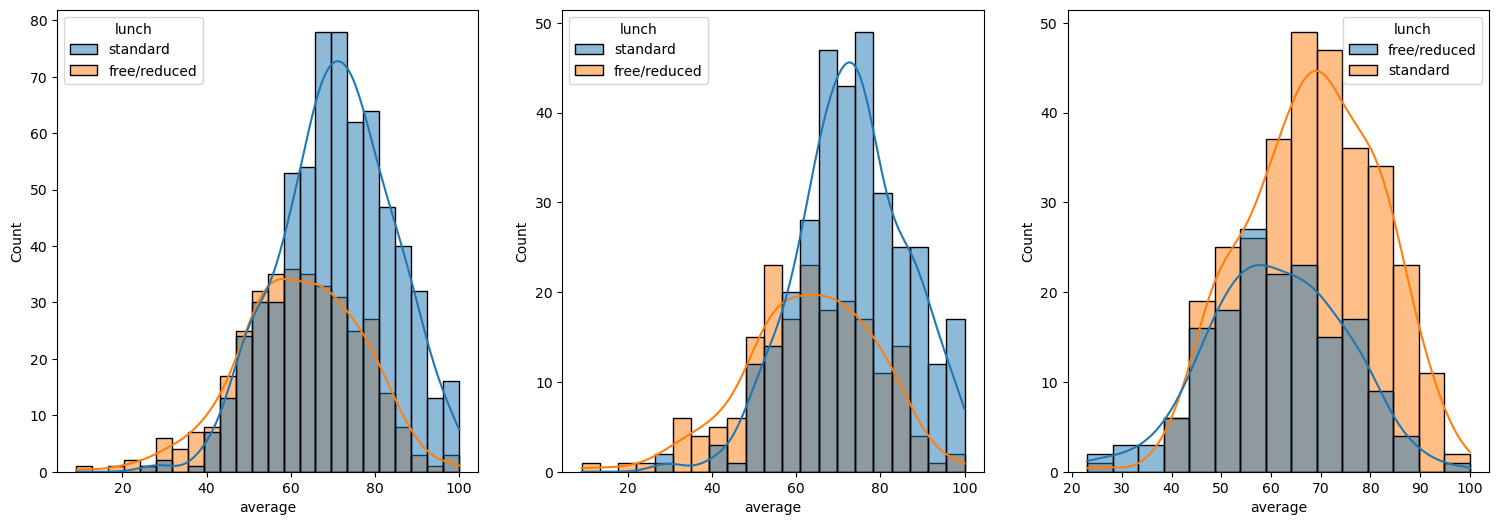

In [18]:
# Comparing wrt Lunch
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='average',kde=True,hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='lunch')
plt.show()

- Lunch Helps students perform well in exams (In both cases male as well as females)

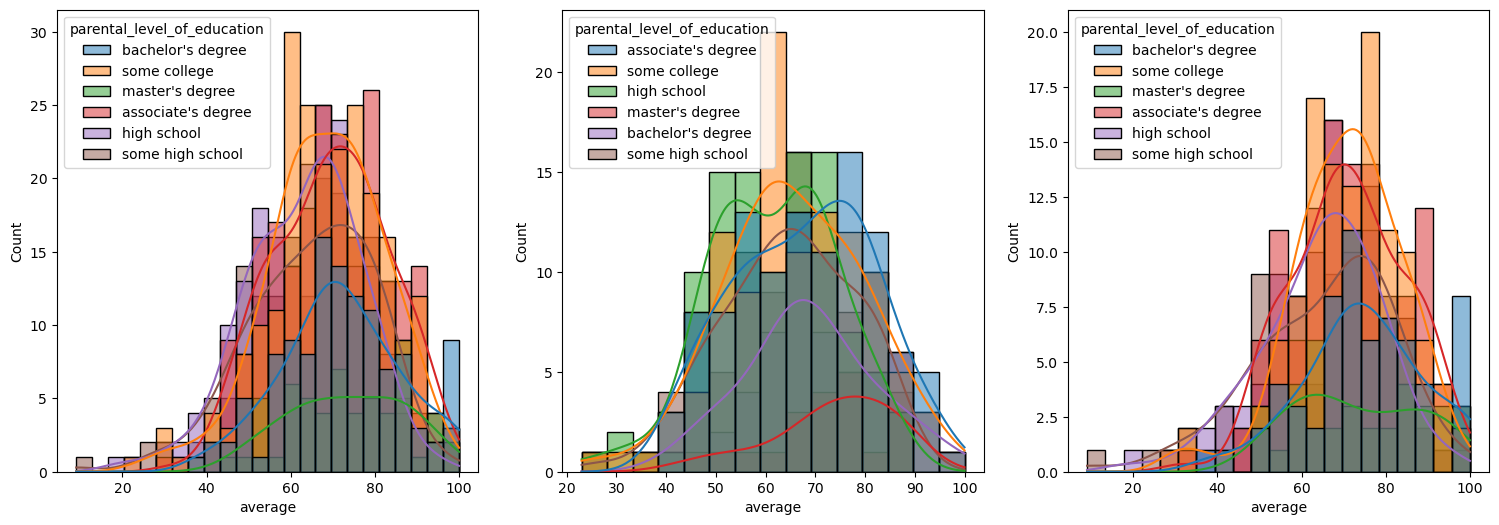

In [20]:
# Comparing wrt Parental Education
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='average',kde=True,hue='parental_level_of_education')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='parental_level_of_education')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='parental_level_of_education')
plt.show()

- Ingeneral Parental Education doesnt play a major role in students performance during exams
- Male students perform well in case of parents having Master's Degree and Associate's Degree
- Parental education has no effect on Female Students (just a slight increase in case of parents having Master's Degree)

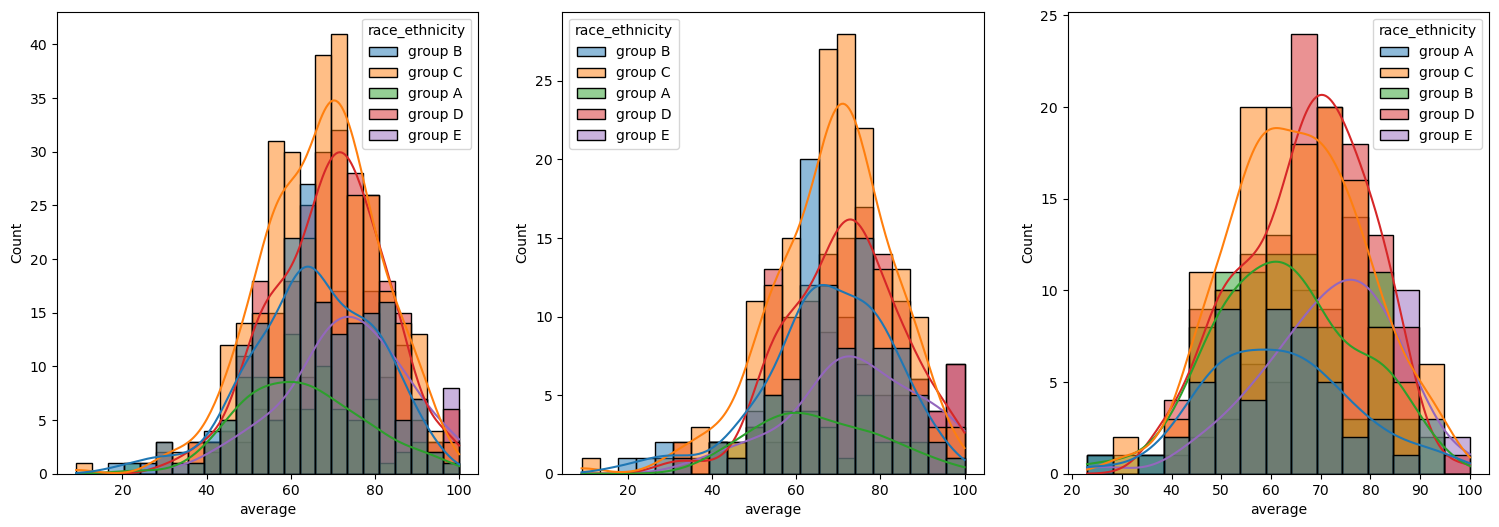

In [21]:
# Comparing with race ethnicity
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='average',kde=True,hue='race_ethnicity')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='race_ethnicity')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='race_ethnicity')
plt.show()

- Students with Race - Group 'E' performs well in case of male students
- Students of Group-A and Group-B perform poorly (in both cases of male as well as female)

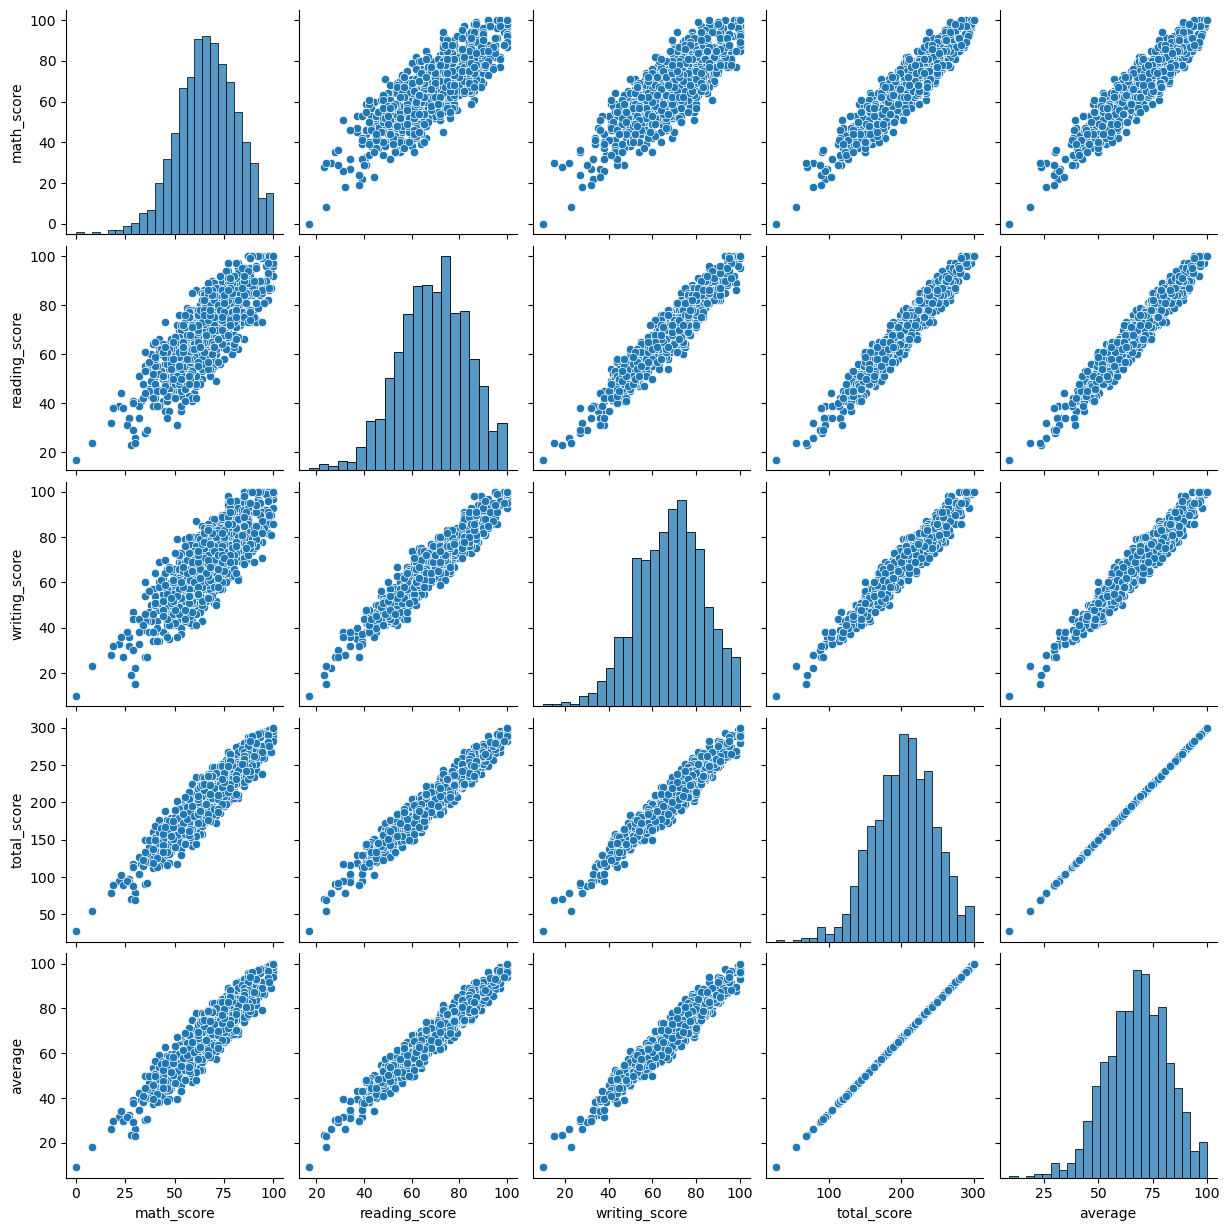

In [22]:
# Visualizing Numerical Features
sns.pairplot(df)

<AxesSubplot:>

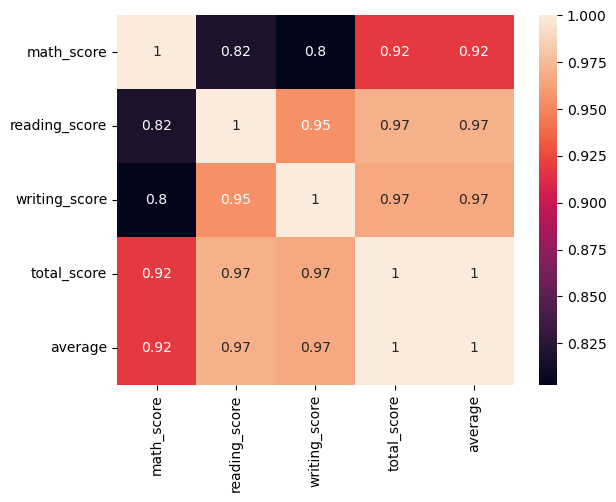

In [23]:
# Finding Co-relations
sns.heatmap(df.corr(),annot=True)

- Reading, Writing and Math scores are highly Correalted with each others